In [1]:
library(readr)
library(dplyr)
library(lubridate)
library(DT)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(tidyverse)
library(rlang)
library(scales)
library(corrplot)
library(magick)
library(reshape2)
library(corrplot)
library(patchwork)
library(RColorBrewer)
library(dplyr)
library(tidyr)
library(ggplot2)
library(patchwork)
library(scales)
library(grf)
library(tidymodels)
library(shiny)
library(shinydashboard)
library(DT)
library(RColorBrewer)
library(gridExtra)
library(zoo) 
library(tensorflow)
library(keras) 

tf$config$list_physical_devices('GPU')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
✔ stringr 1.5.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice



Attaching package: ‘scales’


The following obj

list()

| Feature Category      | Column Name      | Type        | Description                                                            |
|----------------------|-----------------|------------|------------------------------------------------------------------------|
| Client-Related       | age             | Numeric     | Age of the client                                                      |
|                      | job             | Categorical| Client's job type (e.g., admin, technician, unemployed)               |
|                      | marital         | Categorical| Marital status (married, single, divorced, unknown)                   |
|                      | education       | Categorical| Education level (basic.4y, high.school, professional.course, university.degree, etc.) |
|                      | default         | Categorical| Credit in default (yes, no, unknown)                                   |
|                      | housing         | Categorical| Housing loan status (yes, no, unknown)                                 |
|                      | loan            | Categorical| Personal loan status (yes, no, unknown)                                |
| Contact-Related      | contact         | Categorical| Communication type (telephone, cellular)                               |
|                      | month           | Categorical| Month of last contact                                                  |
|                      | day_of_week     | Categorical| Day of the week of last contact                                        |
|                      | duration        | Numeric     | Duration of last contact call (seconds)                                 |
| Campaign-Related     | campaign        | Numeric     | Number of contacts during the current campaign                         |
|                      | pdays           | Numeric     | Days since client was last contacted in previous campaign              |
|                      | previous        | Numeric     | Number of contacts before current campaign                              |
|                      | poutcome        | Categorical| Outcome of previous marketing campaign (nonexistent, failure, success)|
| Socioeconomic        | emp.var.rate    | Numeric     | Employment variation rate (quarterly)                                   |
|                      | cons.price.idx  | Numeric     | Consumer price index (monthly)                                          |
|                      | cons.conf.idx   | Numeric     | Consumer confidence index (monthly)                                     |
|                      | euribor3m       | Numeric     | Euribor 3-month interest rate (daily)                                   |
|                      | nr.employed     | Numeric     | Number of employees (quarterly)                                         |
| Target Variable      | y               | Categorical| Whether the client subscribed to the product (yes, no)                  |


In [2]:
df<-read_csv2("/kaggle/input/direct-marketing-campaigns-bank-marketing/bank_marketing_campaigns_full.csv",show_col_types = FALSE)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



In [3]:
datatable(head(df),options=list(scrollX=TRUE,scrollY="200px",pageLength=5,autoWidth=TRUE))

HTML widgets cannot be represented in plain text (need html)

In [4]:
dim(df)

[1] 41188    21

In [5]:
colSums(is.na(df))

age            job        marital      education        default 
             0              0              0              0              0 
       housing           loan        contact          month    day_of_week 
             0              0              0              0              0 
      duration       campaign          pdays       previous       poutcome 
             0              0              0              0              0 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
             0              0              0              0              0 
             y 
             0

In [6]:
str(df)

spc_tbl_ [41,188 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age           : num [1:41188] 56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr [1:41188] "housemaid" "services" "services" "admin." ...
 $ marital       : chr [1:41188] "married" "married" "married" "married" ...
 $ education     : chr [1:41188] "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr [1:41188] "no" "unknown" "no" "no" ...
 $ housing       : chr [1:41188] "no" "no" "yes" "no" ...
 $ loan          : chr [1:41188] "no" "no" "no" "no" ...
 $ contact       : chr [1:41188] "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr [1:41188] "may" "may" "may" "may" ...
 $ day_of_week   : chr [1:41188] "mon" "mon" "mon" "mon" ...
 $ duration      : num [1:41188] 261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : num [1:41188] 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : num [1:41188] 999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : num [1:41188]

# ReName ColNames

In [7]:
df <- df %>%
  rename(
    Age = age,
    Job_Type = job,
    Marital_Status = marital,
    Education_Level = education,
    Credit_Default = default,
    Housing_Loan = housing,
    Personal_Loan = loan,
    Contact_Type = contact,
    Last_Contact_Month = month,
    Last_Contact_Day = day_of_week,
    Last_Contact_Duration = duration,
    Campaign_Contacts = campaign,
    Days_Since_Last_Contact = pdays,
    Previous_Contacts = previous,
    Previous_Campaign_Outcome = poutcome,
    Employment_Variation_Rate = emp.var.rate,
    Consumer_Price_Index = cons.price.idx,
    Consumer_Confidence_Index = cons.conf.idx,
    Euribor_3M_Rate = euribor3m,
    Number_Employees = nr.employed,
    Subscribed = y
  )


colnames(df)

[1] "Age"                       "Job_Type"                 
 [3] "Marital_Status"            "Education_Level"          
 [5] "Credit_Default"            "Housing_Loan"             
 [7] "Personal_Loan"             "Contact_Type"             
 [9] "Last_Contact_Month"        "Last_Contact_Day"         
[11] "Last_Contact_Duration"     "Campaign_Contacts"        
[13] "Days_Since_Last_Contact"   "Previous_Contacts"        
[15] "Previous_Campaign_Outcome" "Employment_Variation_Rate"
[17] "Consumer_Price_Index"      "Consumer_Confidence_Index"
[19] "Euribor_3M_Rate"           "Number_Employees"         
[21] "Subscribed"

In [8]:
str(df)

spc_tbl_ [41,188 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age                      : num [1:41188] 56 57 37 40 56 45 59 41 24 25 ...
 $ Job_Type                 : chr [1:41188] "housemaid" "services" "services" "admin." ...
 $ Marital_Status           : chr [1:41188] "married" "married" "married" "married" ...
 $ Education_Level          : chr [1:41188] "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ Credit_Default           : chr [1:41188] "no" "unknown" "no" "no" ...
 $ Housing_Loan             : chr [1:41188] "no" "no" "yes" "no" ...
 $ Personal_Loan            : chr [1:41188] "no" "no" "no" "no" ...
 $ Contact_Type             : chr [1:41188] "telephone" "telephone" "telephone" "telephone" ...
 $ Last_Contact_Month       : chr [1:41188] "may" "may" "may" "may" ...
 $ Last_Contact_Day         : chr [1:41188] "mon" "mon" "mon" "mon" ...
 $ Last_Contact_Duration    : num [1:41188] 261 149 226 151 307 198 139 217 380 50 ...
 $ Campaign_Contacts        : num [1:41188] 1

In [9]:
datatable(head(df),options=list(scrollX=TRUE,scrollY="200px",pageLength=5,autoWidth=TRUE))

HTML widgets cannot be represented in plain text (need html)

In [10]:
df <- df %>%
  mutate(
    Subscribed = factor(Subscribed, levels = c("no", "yes")),
      
    across(c(Job_Type, Marital_Status, Education_Level, Credit_Default,
             Housing_Loan, Personal_Loan, Contact_Type, Last_Contact_Month,
             Last_Contact_Day, Previous_Campaign_Outcome), factor),
      
    across(c(Age, Last_Contact_Duration, Campaign_Contacts,
             Days_Since_Last_Contact, Previous_Contacts,
             Employment_Variation_Rate, Consumer_Price_Index,
             Consumer_Confidence_Index, Number_Employees), as.numeric),
    Euribor_3M_Rate = as.numeric(Euribor_3M_Rate)
  )

df <- df %>% mutate(Never_Contacted = ifelse(Days_Since_Last_Contact == 999, "Yes", "No") %>% factor())

cat("Data ready! Rows:", nrow(df), "\n")

Data ready! Rows: 41188 


# Target Distribution

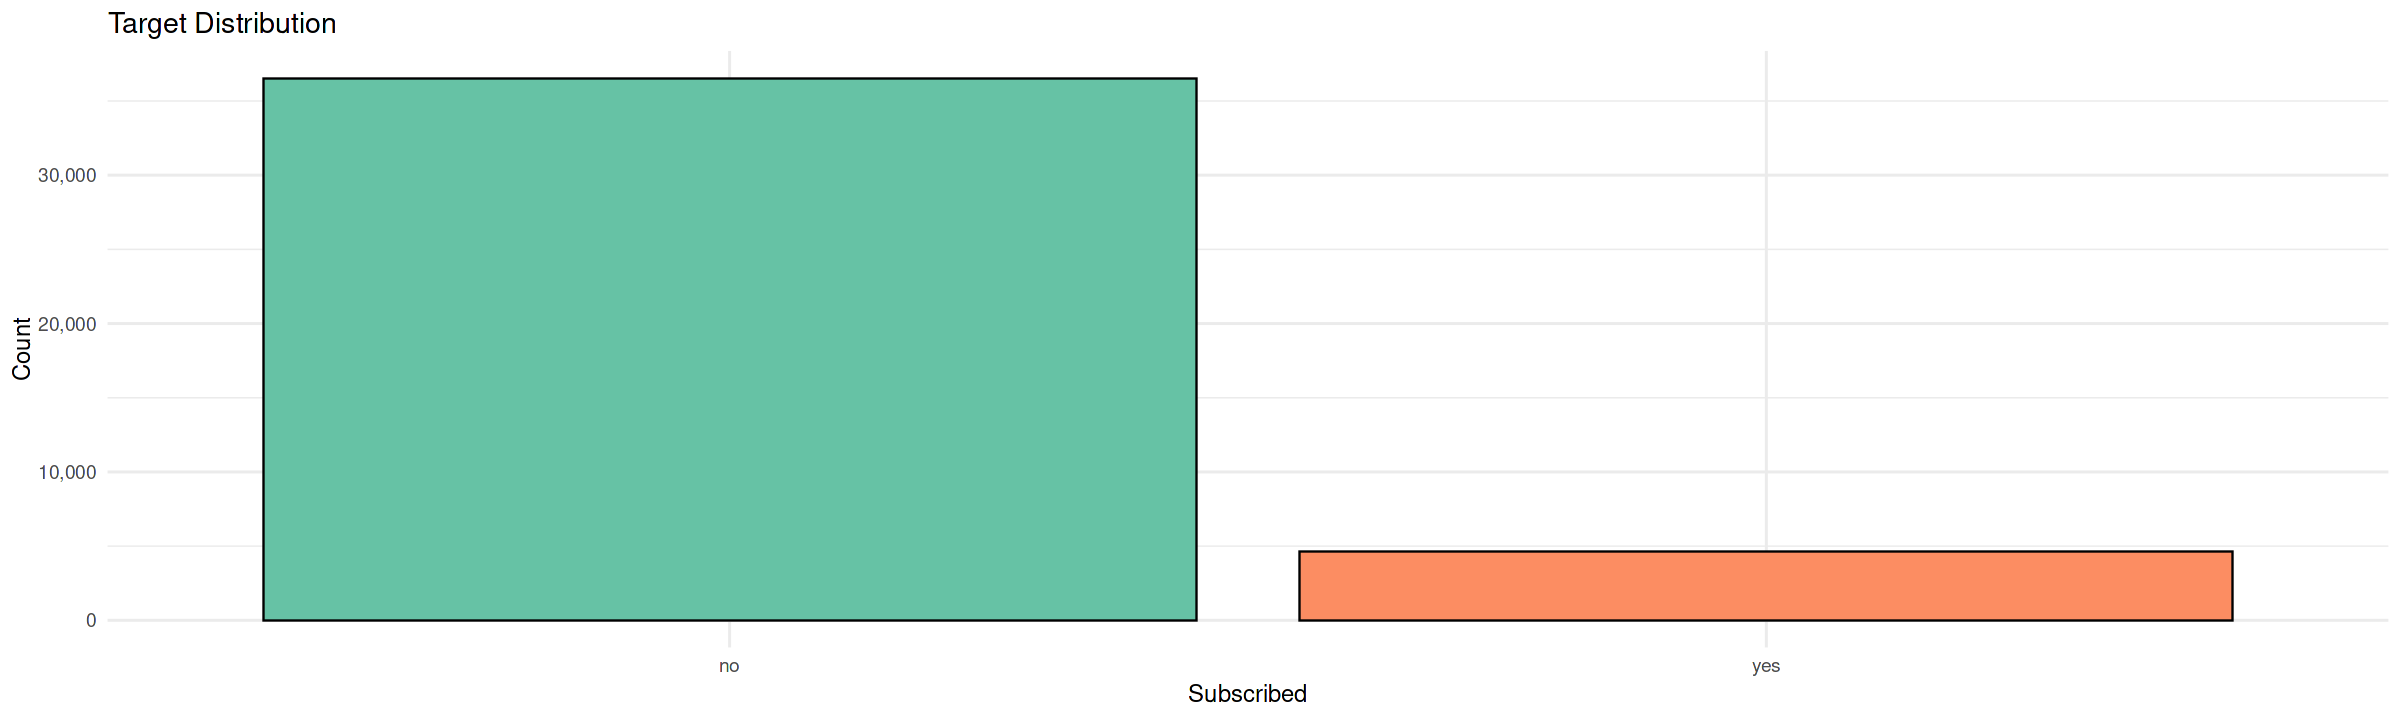

In [11]:
pal <- brewer.pal(3, "Set2")[1:2]

p_target <- ggplot(df, aes(x = Subscribed, fill = Subscribed)) +
  geom_bar(color = "black") +
  scale_fill_manual(values = pal) +
  labs(title = "Target Distribution", x = "Subscribed", y = "Count") +
  scale_y_continuous(labels = comma) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none")

options(repr.plot.width = 20, repr.plot.height = 6)  # width x

print(p_target)

# Subscription Rate by Categorical (Top 6)

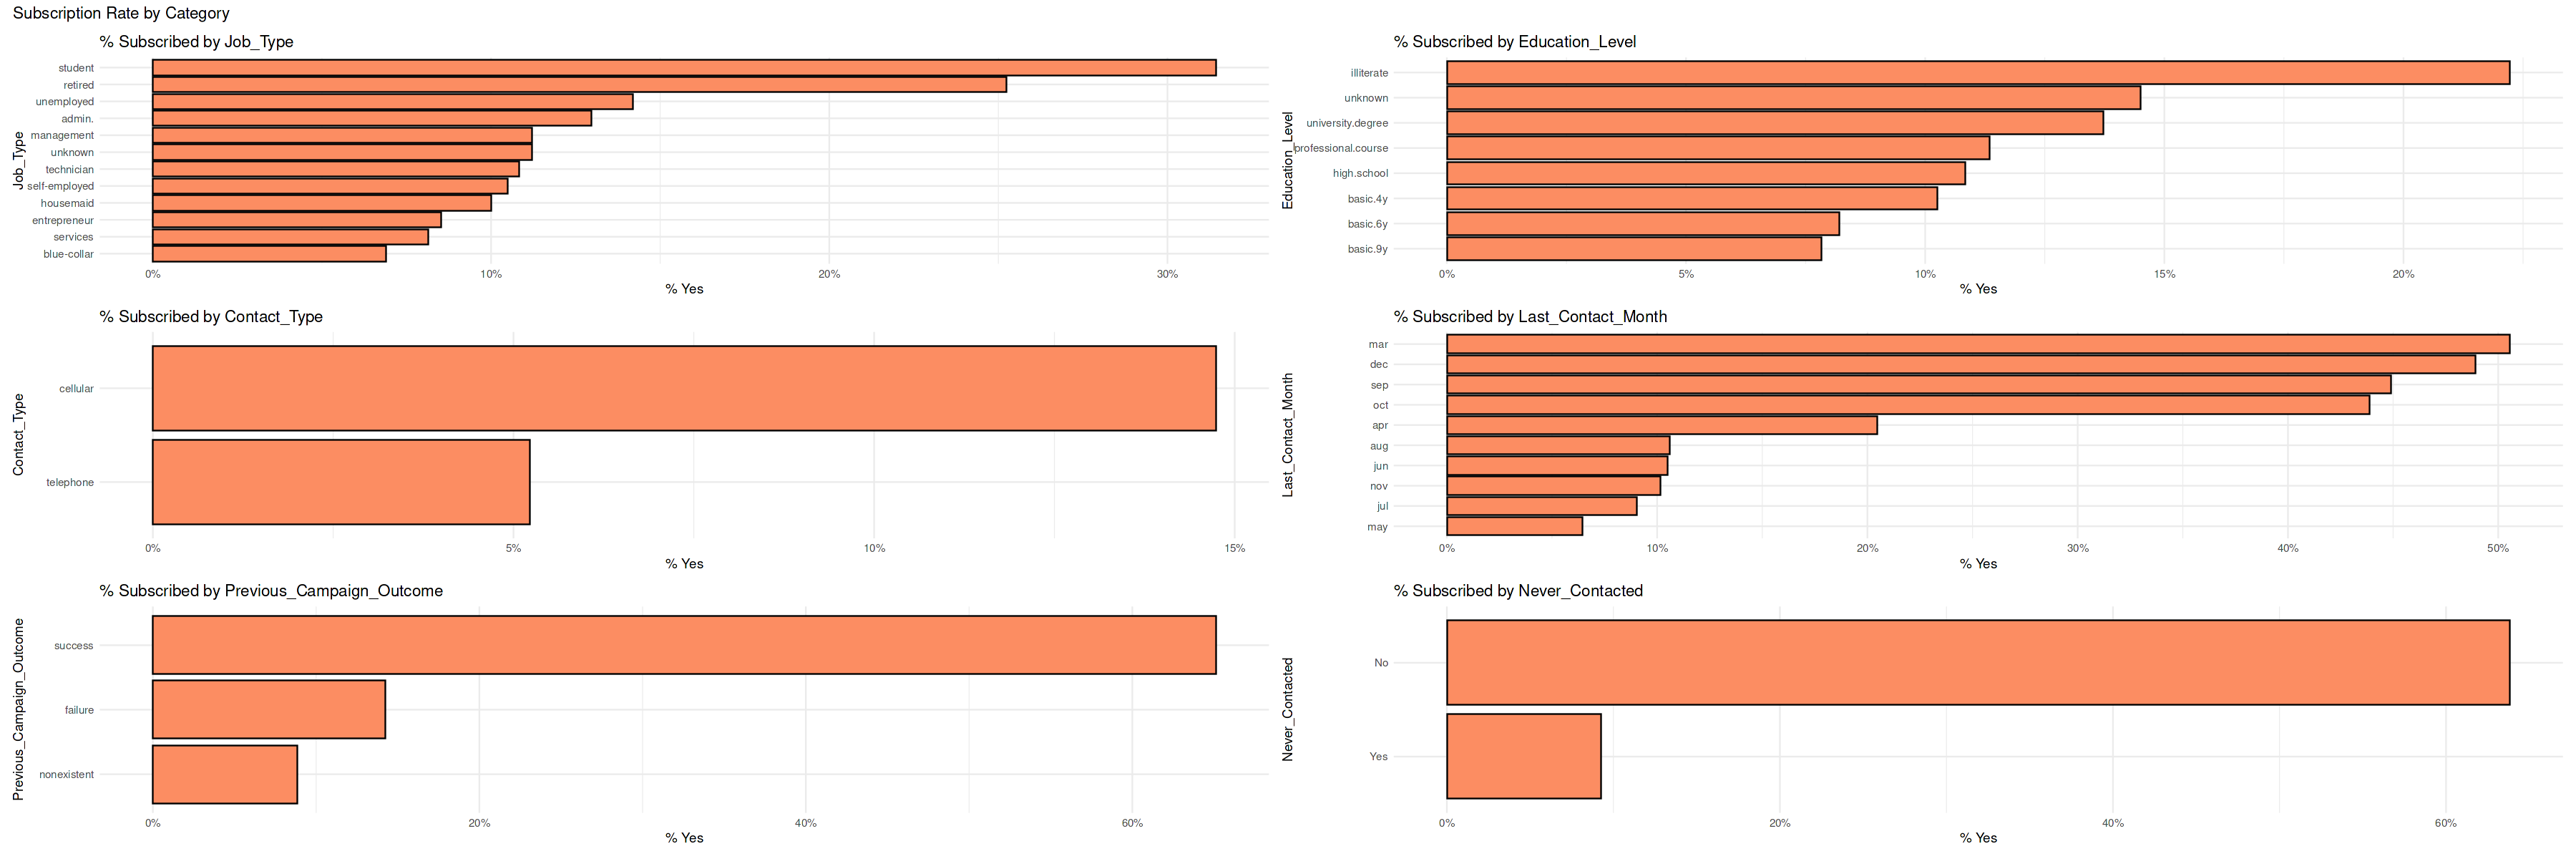

In [12]:
cat_vars <- c("Job_Type", "Education_Level", "Contact_Type", 
              "Last_Contact_Month", "Previous_Campaign_Outcome", "Never_Contacted")

plot_rate <- function(var) {
  df %>%
    count(.data[[var]], Subscribed) %>%
    group_by(.data[[var]]) %>%
    mutate(prop = n / sum(n)) %>%
    filter(Subscribed == "yes") %>%
    ggplot(aes(x = fct_reorder(.data[[var]], prop), y = prop)) +
    geom_col(fill = pal[2], color = "black") +
    coord_flip() +
    scale_y_continuous(labels = percent) +
    labs(title = paste("% Subscribed by", var), x = var, y = "% Yes") +
    theme_minimal()
}
options(repr.plot.width = 30, repr.plot.height = 10)

rate_plots <- lapply(cat_vars, plot_rate)
wrap_plots(rate_plots, ncol = 2) + plot_annotation(title = "Subscription Rate by Category")

# Duration vs Age (Scatter + Trend)

`geom_smooth()` using formula = 'y ~ x'


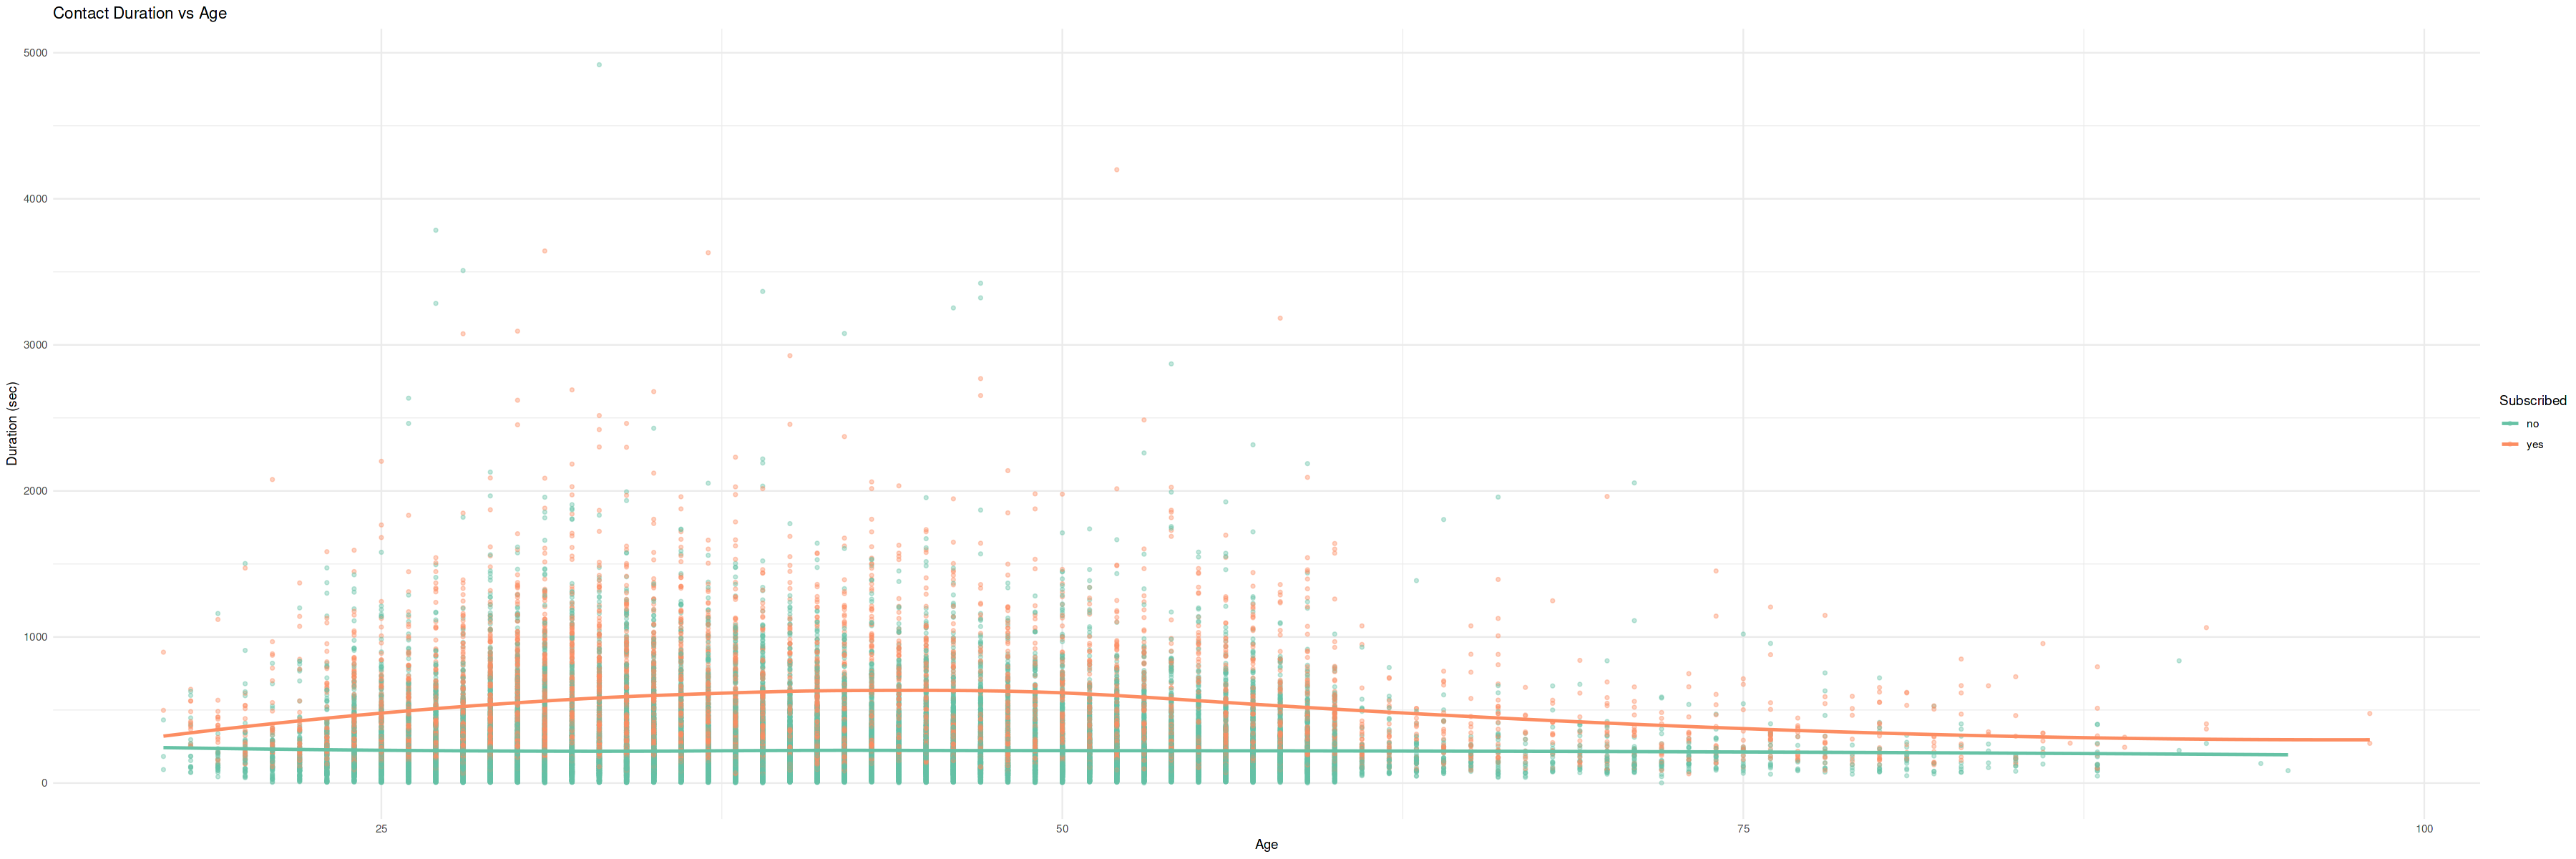

In [13]:
p_scatter <- ggplot(df, aes(x = Age, y = Last_Contact_Duration, color = Subscribed)) +
  geom_point(alpha = 0.4, size = 1) +
  geom_smooth(method = "loess", se = FALSE) +
  scale_color_manual(values = pal) +
  labs(title = "Contact Duration vs Age", x = "Age", y = "Duration (sec)") +
  theme_minimal()

print(p_scatter)

# Boxplots: Key Numerics vs Target

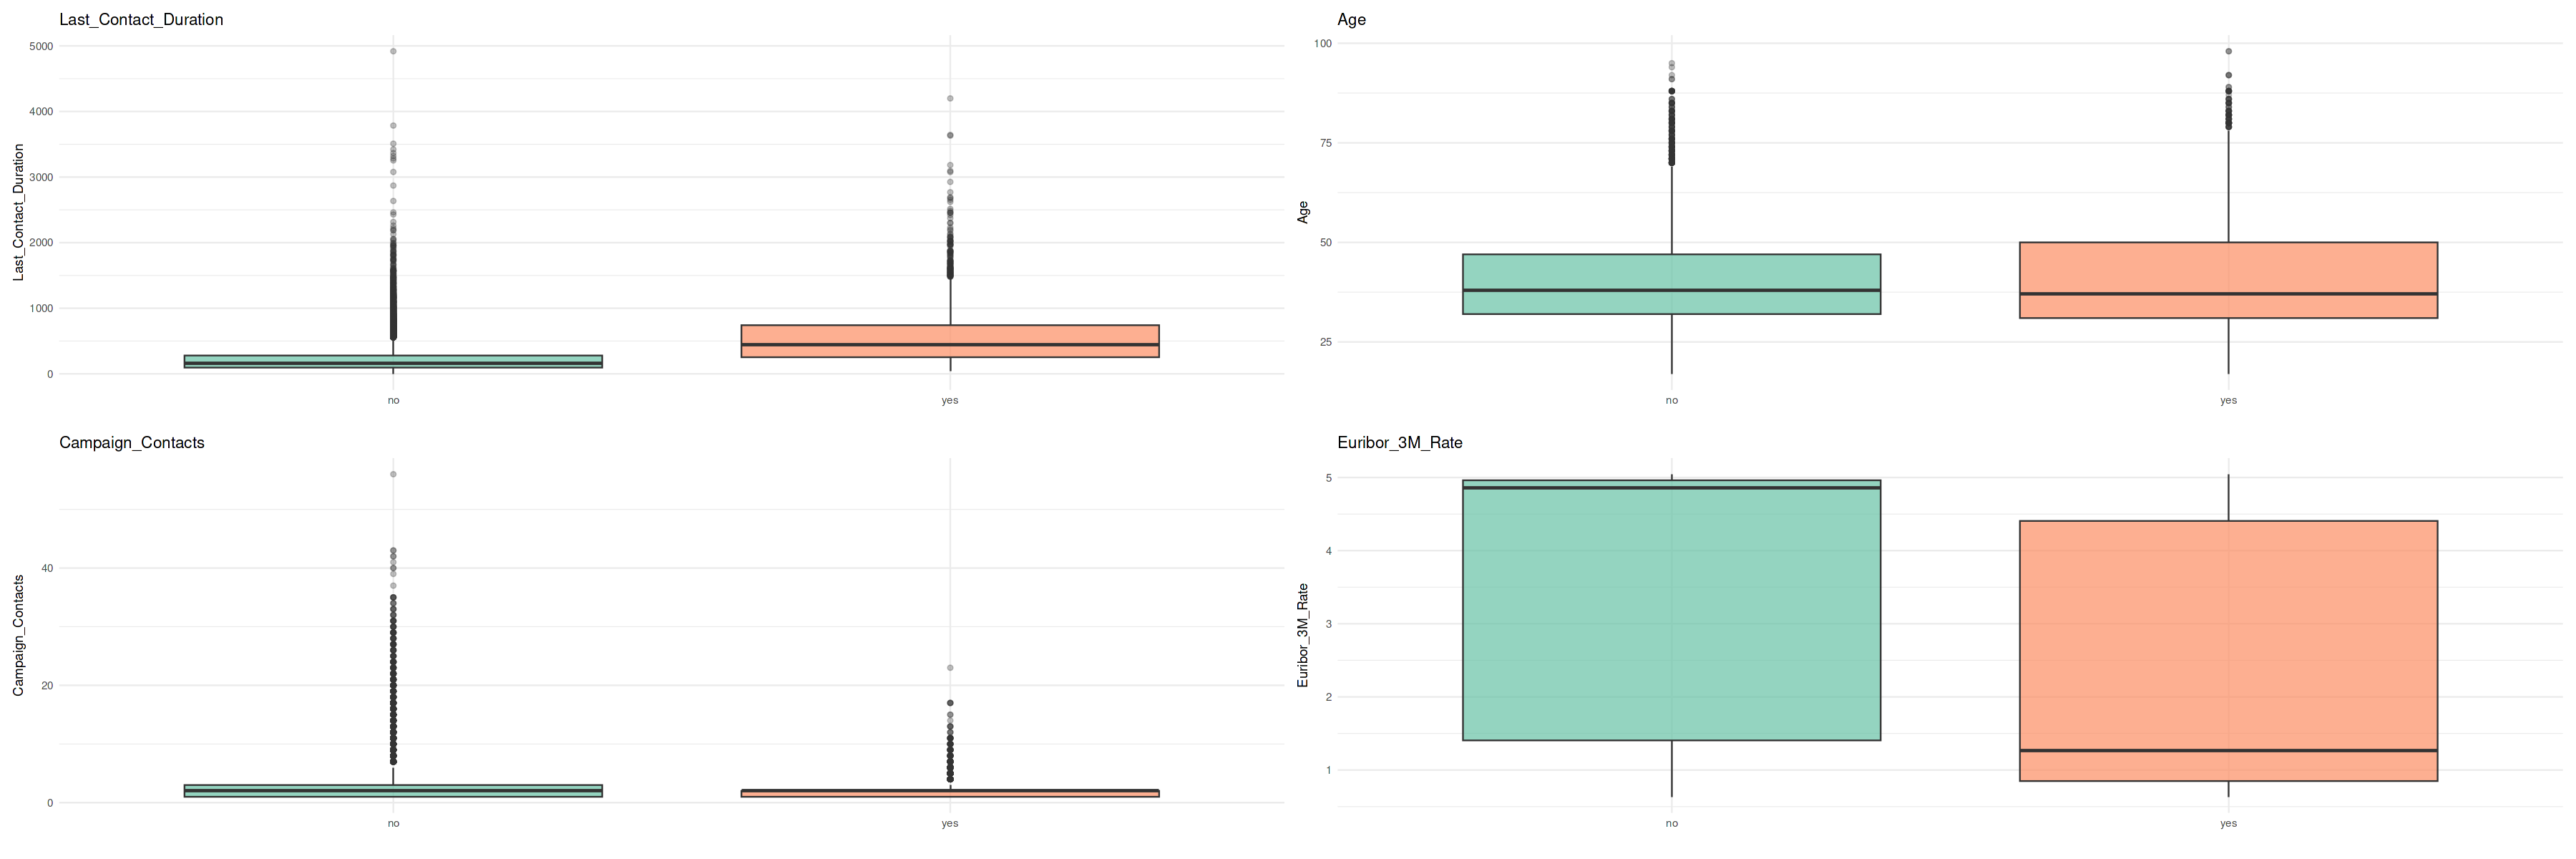

In [14]:
key_num <- c("Last_Contact_Duration", "Age", "Campaign_Contacts", "Euribor_3M_Rate")

box_plot <- function(var) {
  ggplot(df, aes(x = Subscribed, y = .data[[var]], fill = Subscribed)) +
    geom_boxplot(alpha = 0.7, outlier.alpha = 0.3) +
    scale_fill_manual(values = pal) +
    labs(title = var, x = "", y = var) +
    theme_minimal() +
    theme(legend.position = "none")
}

box_plots <- lapply(key_num, box_plot)
wrap_plots(box_plots, ncol = 2)

# Correlation Matrix

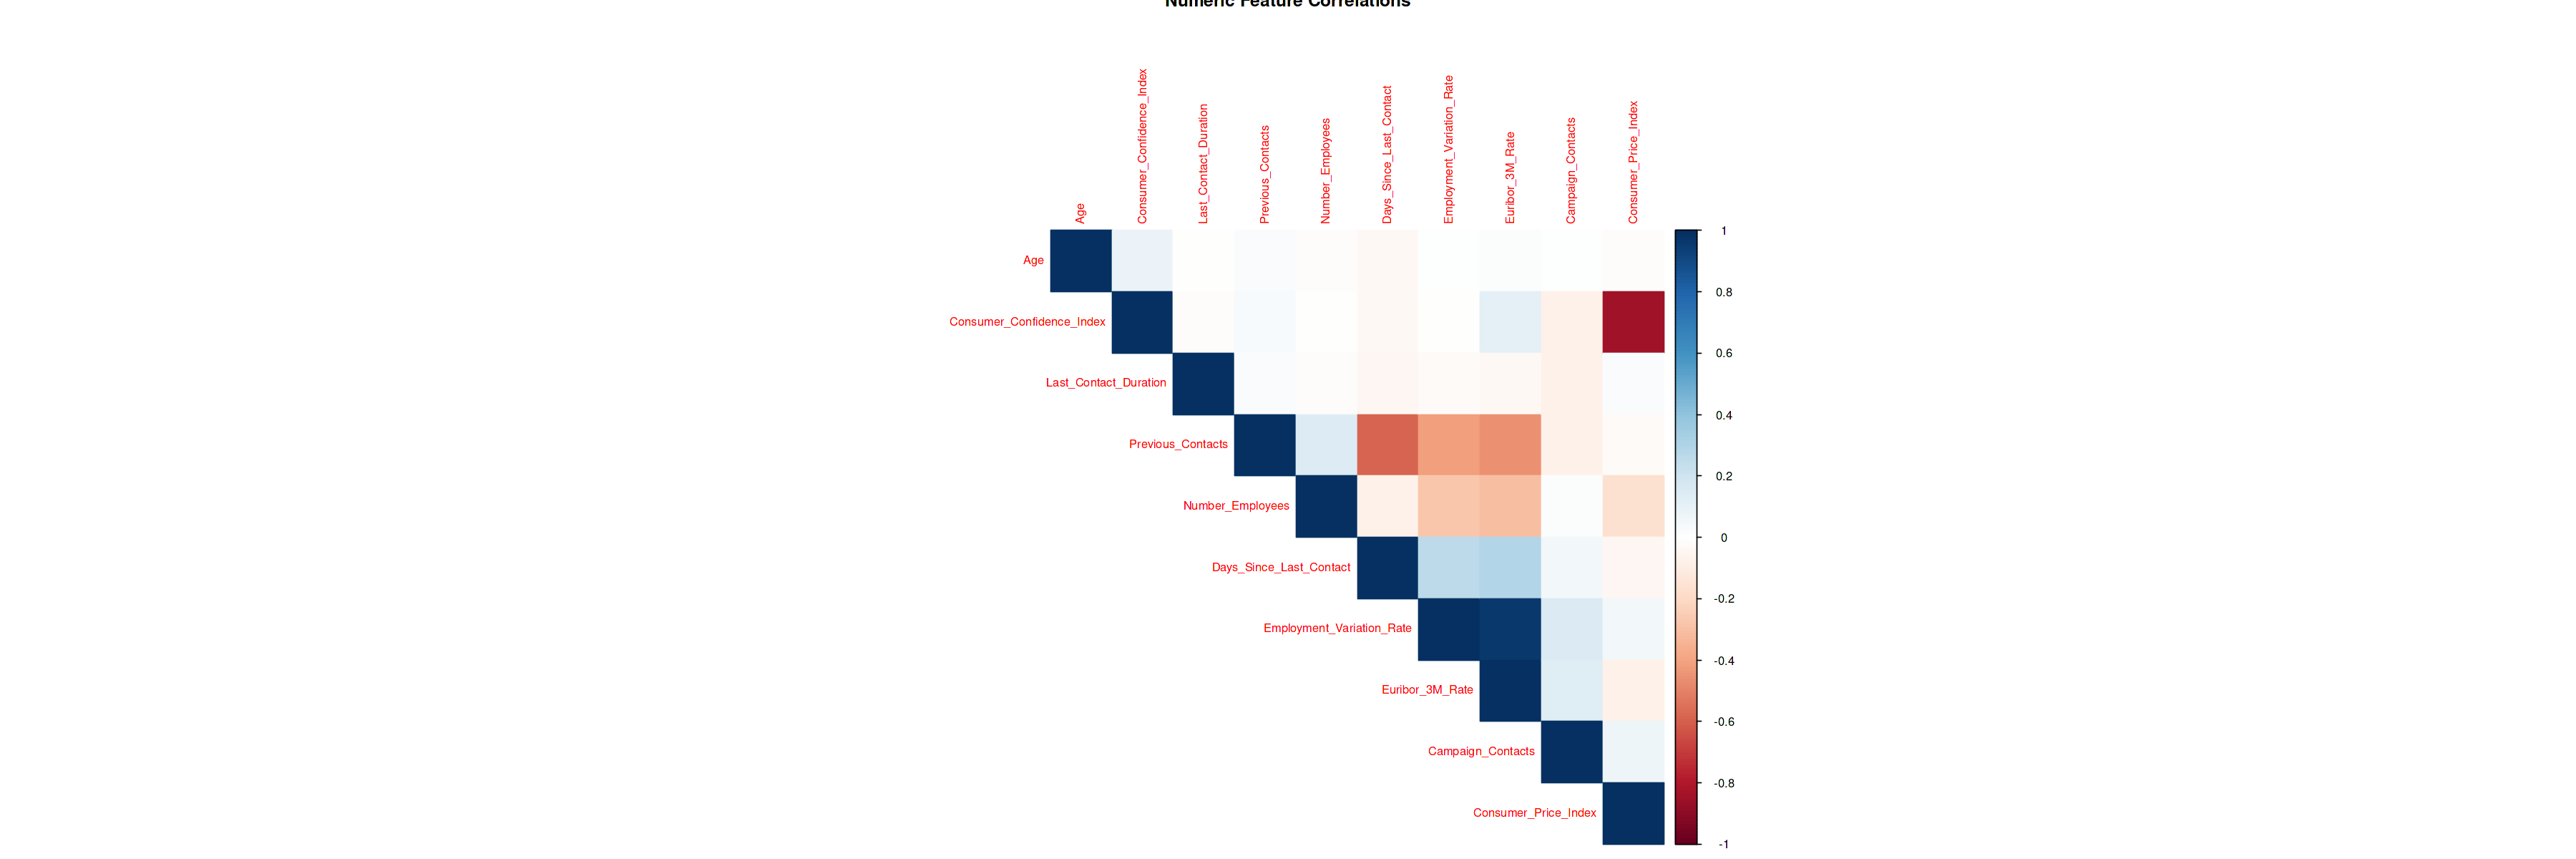

In [15]:
num_vars <- c("Age", "Last_Contact_Duration", "Campaign_Contacts",
              "Days_Since_Last_Contact", "Previous_Contacts",
              "Employment_Variation_Rate", "Consumer_Price_Index",
              "Consumer_Confidence_Index", "Euribor_3M_Rate", "Number_Employees")

cor_mat <- cor(df %>% select(all_of(num_vars)), use = "pairwise")
corrplot(cor_mat, method = "color", type = "upper", 
         order = "hclust", tl.cex = 0.8, 
         title = "Numeric Feature Correlations")

# Never Contacted Effect (pdays = 999)

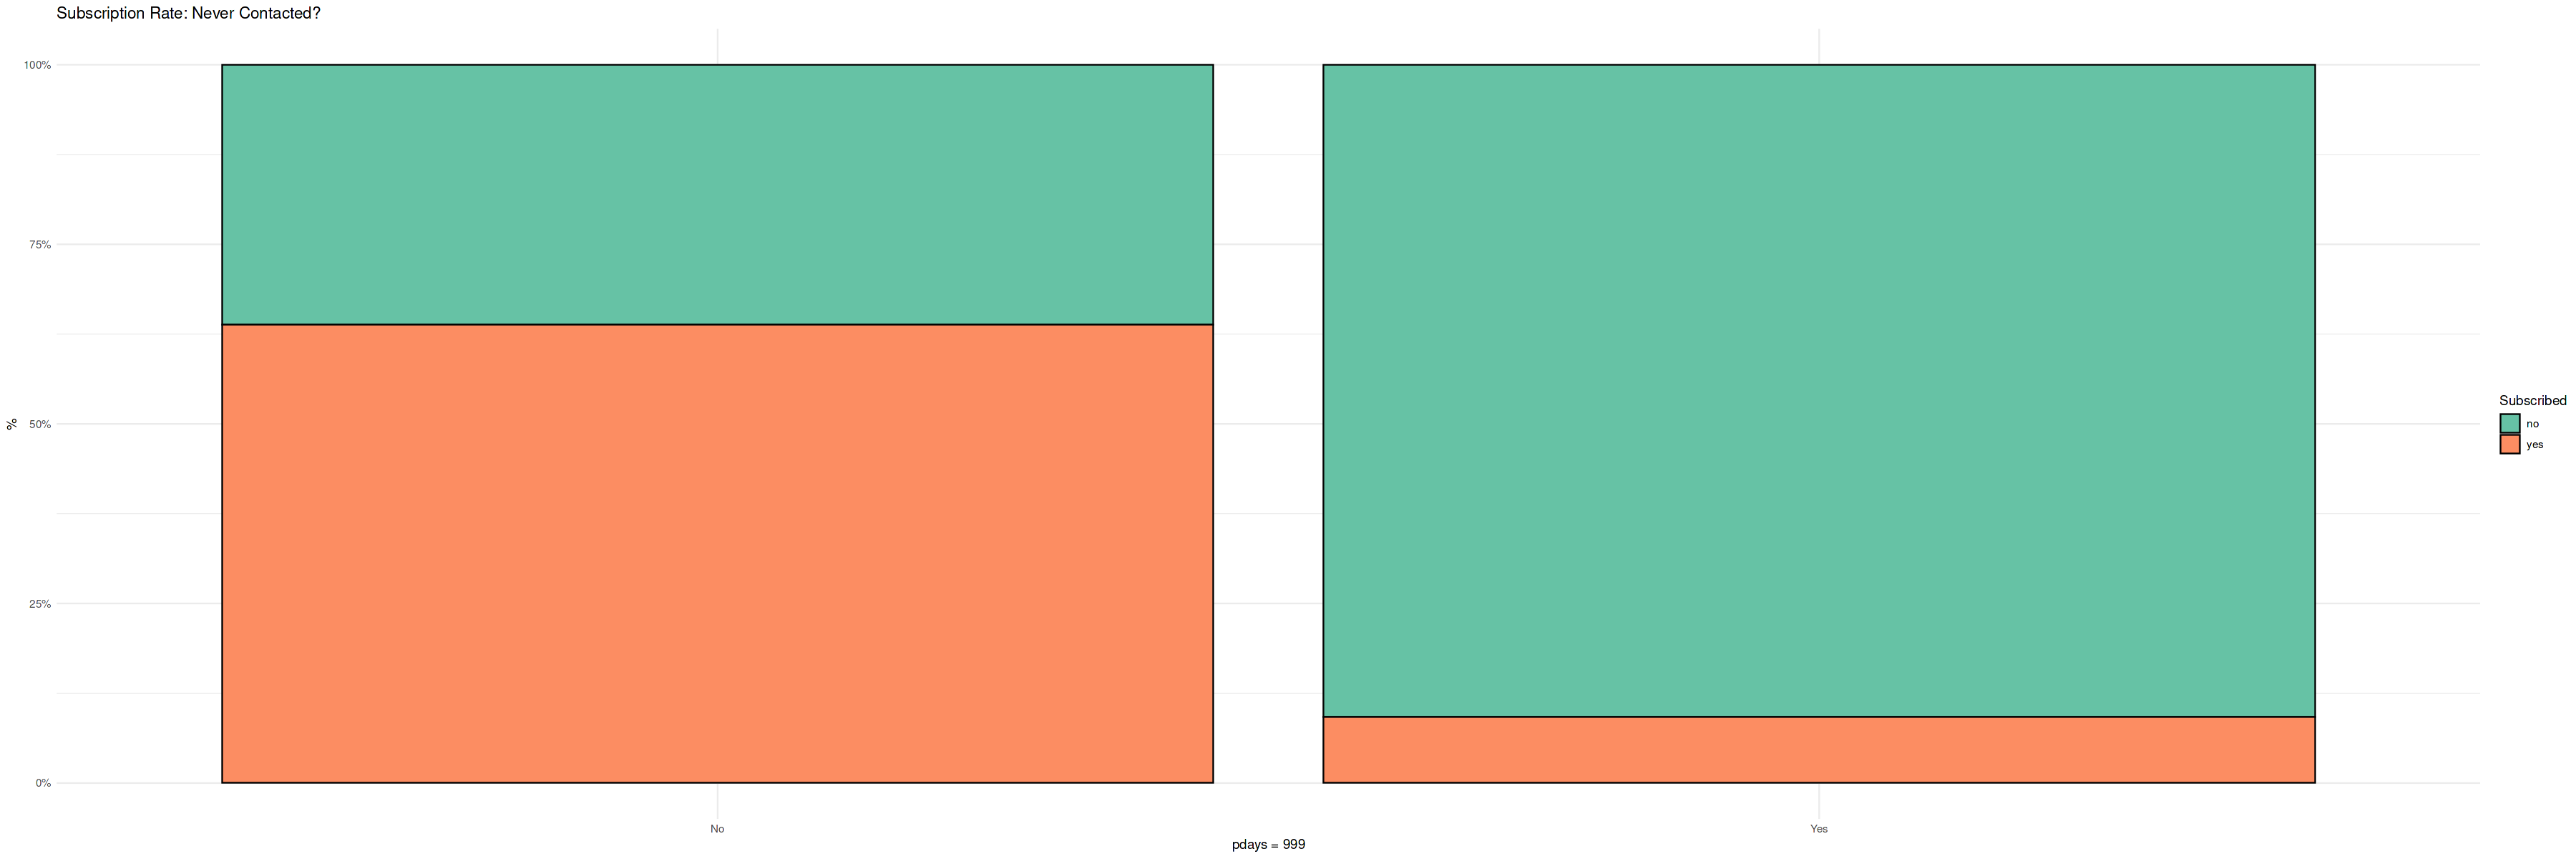

In [16]:
p_pdays <- ggplot(df, aes(x = Never_Contacted, fill = Subscribed)) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = pal) +
  scale_y_continuous(labels = percent) +
  labs(title = "Subscription Rate: Never Contacted?", x = "pdays = 999", y = "%") +
  theme_minimal()

print(p_pdays)

# Ridge Plots (Duration & Age)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Picking joint bandwidth of 37.9

Picking joint bandwidth of 1.7



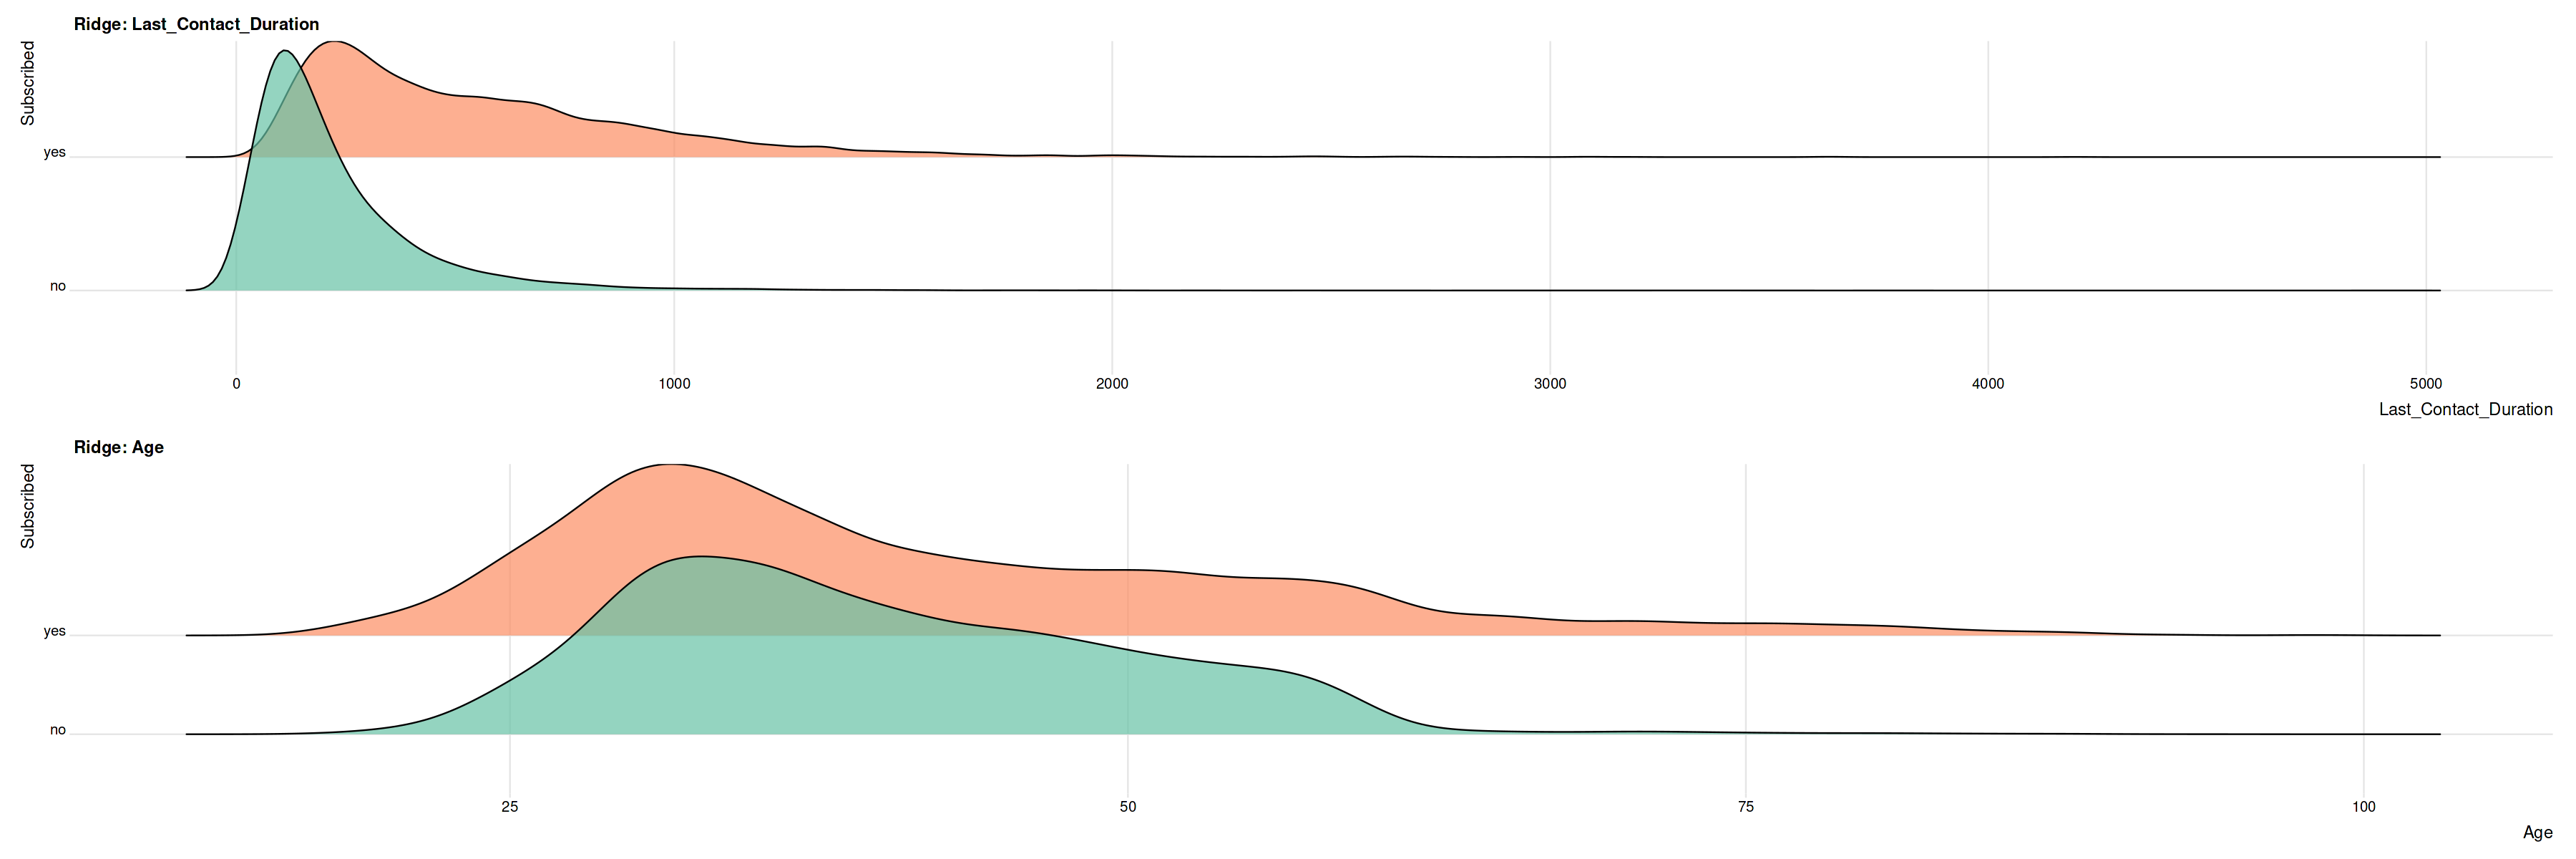

In [17]:
install.packages("ggridges")

library(ggridges)


ridge_plot <- function(var) {
  ggplot(df, aes(x = .data[[var]], y = Subscribed, fill = Subscribed)) +
    geom_density_ridges(alpha = 0.7) +
    scale_fill_manual(values = pal) +
    labs(title = paste("Ridge:", var)) +
    theme_ridges() +
    theme(legend.position = "none")
}

ridge1 <- ridge_plot("Last_Contact_Duration")
ridge2 <- ridge_plot("Age")
ridge1 / ridge2

# Heatmap: Campaign Contacts × Previous Outcome

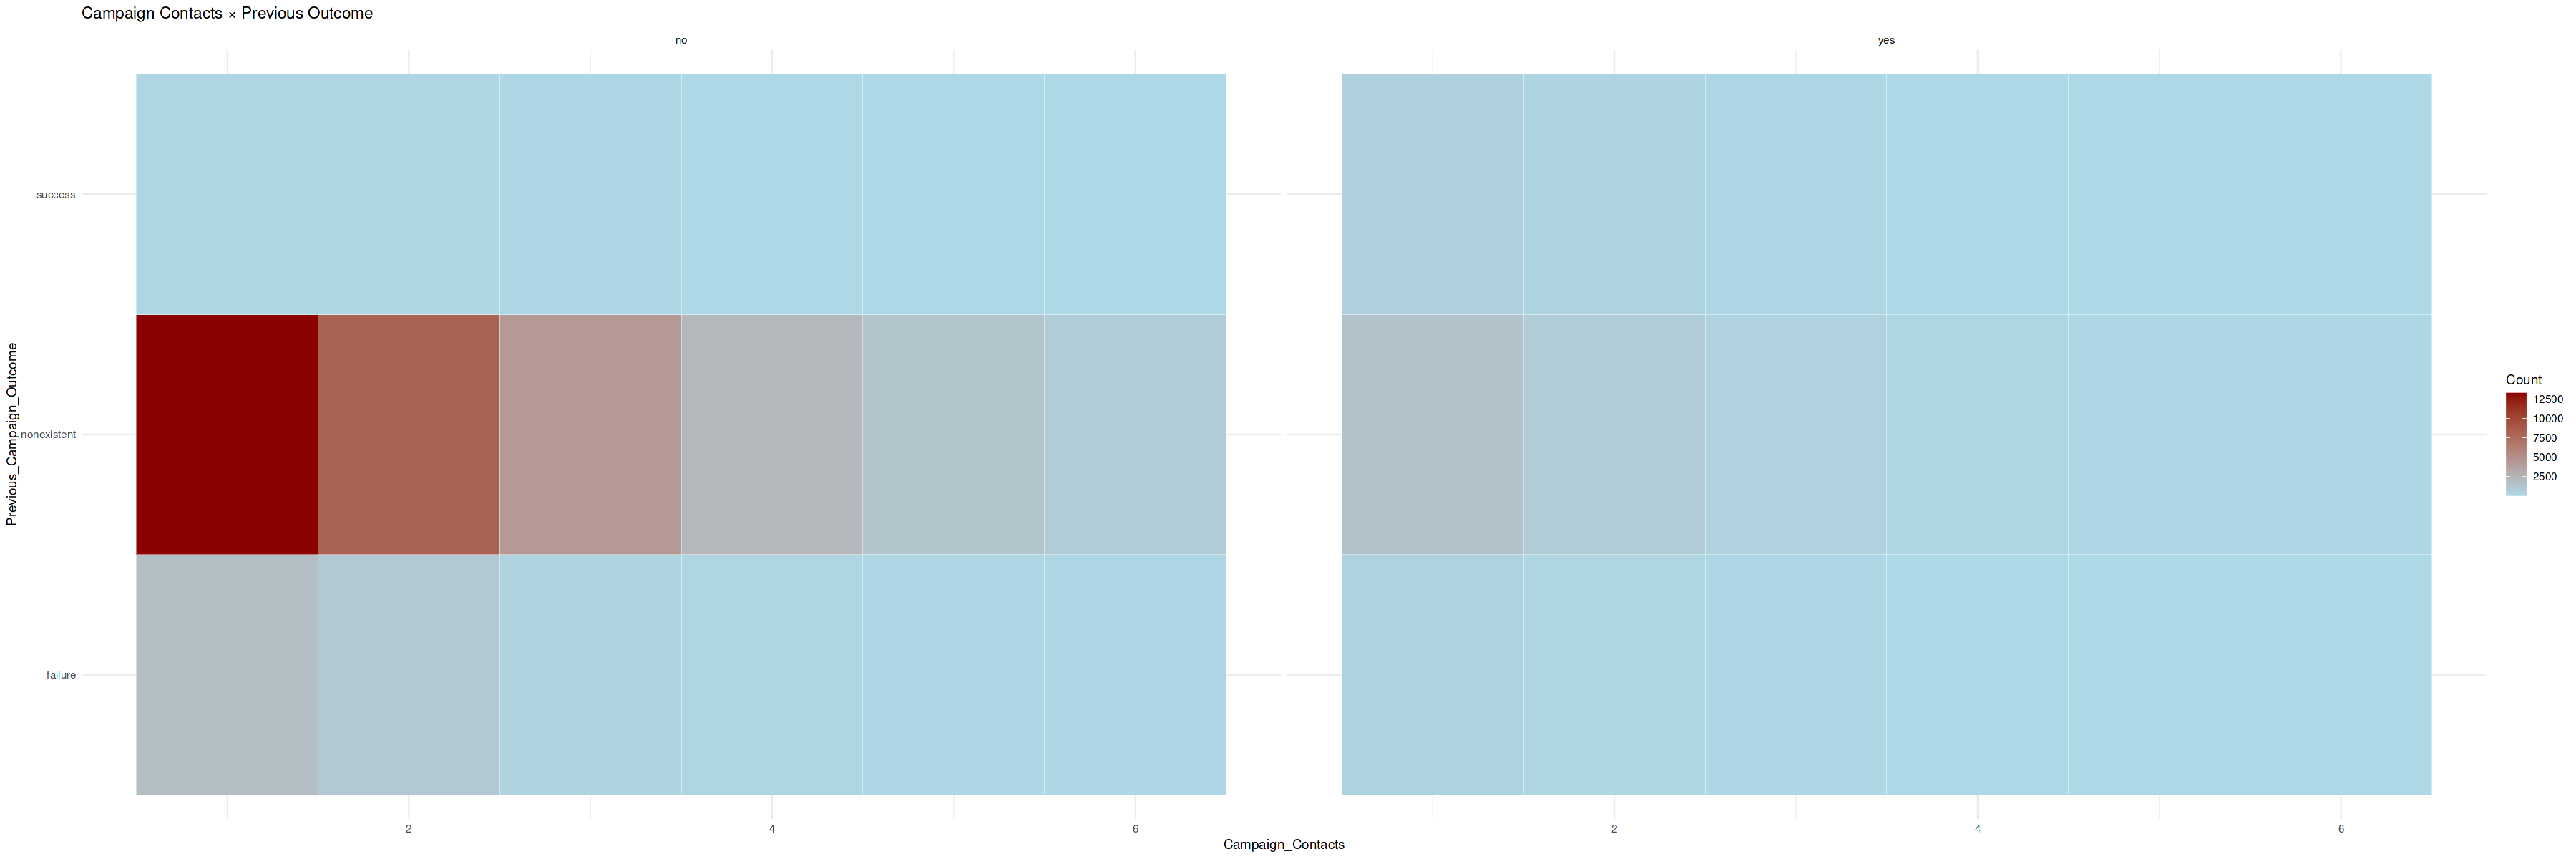

In [18]:
df_heat <- df %>%
  filter(Campaign_Contacts <= 6) %>%  # limit for clarity
  count(Campaign_Contacts, Previous_Campaign_Outcome, Subscribed)

ggplot(df_heat, aes(x = Campaign_Contacts, y = Previous_Campaign_Outcome, fill = n)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "lightblue", high = "darkred") +
  facet_wrap(~ Subscribed) +
  labs(title = "Campaign Contacts × Previous Outcome", fill = "Count") +
  theme_minimal()

In [19]:
str(df)

tibble [41,188 × 22] (S3: tbl_df/tbl/data.frame)
 $ Age                      : num [1:41188] 56 57 37 40 56 45 59 41 24 25 ...
 $ Job_Type                 : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ Marital_Status           : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ Education_Level          : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ Credit_Default           : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ Housing_Loan             : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ Personal_Loan            : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ Contact_Type             : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ Last_Contact_Month       : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Last_Contact_Day         : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Last_Co

# Correct Treatment & Feature Prep

In [20]:
df <- df %>%
  mutate(
    # TARGET: Subscribed → 1/0
    y = ifelse(Subscribed == "yes", 1, 0),
    Subscribed = factor(Subscribed, levels = c("no","yes")),
    
    # CORRECT TREATMENT: Previous campaign contact
    treatment = ifelse(Previous_Contacts > 0, 1, 0),
    
    # Never contacted in current campaign
    never_contacted = ifelse(Days_Since_Last_Contact == 999, 1, 0)
  )

# Features (use YOUR exact column names!)
features <- c("Age","Job_Type","Marital_Status","Education_Level","Credit_Default",
              "Housing_Loan","Personal_Loan","Contact_Type","Last_Contact_Month",
              "Last_Contact_Day","Last_Contact_Duration","Campaign_Contacts",
              "Days_Since_Last_Contact","Previous_Contacts","Previous_Campaign_Outcome",
              "Employment_Variation_Rate","Consumer_Price_Index","Consumer_Confidence_Index",
              "Euribor_3M_Rate","Number_Employees","never_contacted")

X <- model.matrix(~ . -1, data = df[, features])
Y <- df$y
W <- df$treatment

cat("Rows:", nrow(df),"| Treated:", sum(W),"| Control:", sum(1-W), "\n")

Rows: 41188 | Treated: 5625 | Control: 35563 


# Causal Forest → ATE + CATE

In [21]:
set.seed(42)
cf <- causal_forest(X = X, Y = Y, W = W,num.trees = 2000,honesty = TRUE,min.node.size = 5,seed = 42)
df$cate <- predict(cf, X)$predictions
# CELL: FIX ATE ESTIMATION
ate <- average_treatment_effect(cf, target.sample = "overlap")
cat("ATE (overlap):", round(ate["estimate"], 4), "±", round(ate["std.err"], 4), "\n")

ATE (overlap): 0.3781 ± 1.4265 


# Visualize CATE Distribution & Top Segments

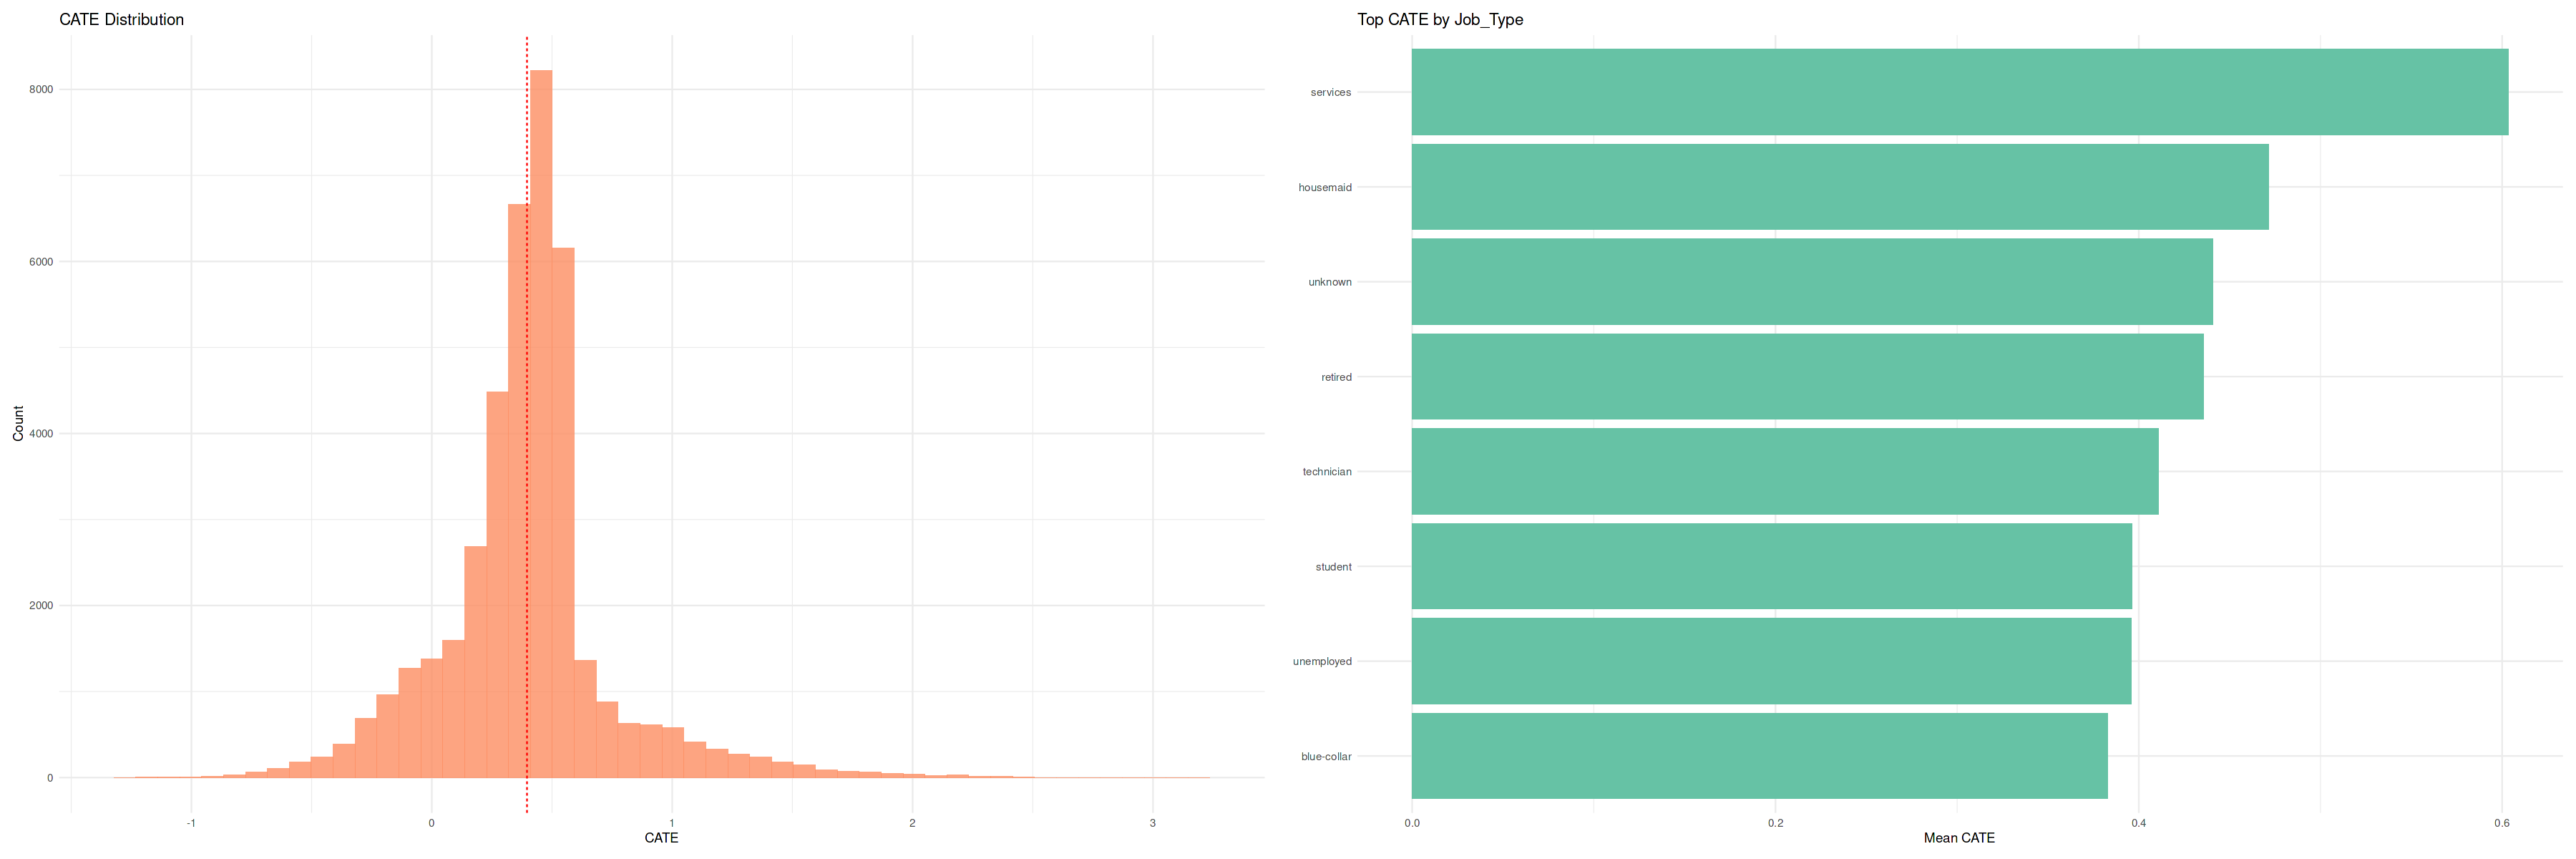

In [22]:
# CELL 5
pal <- brewer.pal(3,"Set2")[1:2]

p1 <- ggplot(df, aes(x = cate)) +
  geom_histogram(bins = 50, fill = pal[2], alpha = 0.8) +
  geom_vline(xintercept = mean(df$cate), color = "red", linetype = "dashed") +
  labs(title = "CATE Distribution", x = "CATE", y = "Count") +
  theme_minimal()

p2 <- df %>%
  group_by(Job_Type) %>%
  summarise(cate = mean(cate), n = n()) %>%
  arrange(desc(cate)) %>%
  head(8) %>%
  ggplot(aes(x = reorder(Job_Type, cate), y = cate)) +
  geom_col(fill = pal[1]) +
  coord_flip() +
  labs(title = "Top CATE by Job_Type", x = "", y = "Mean CATE") +
  theme_minimal()

p1 | p2

In [23]:
saveRDS(df, "bank_causal_final.rds")
saveRDS(cf, "causal_forest_model.rds")
cat("Saved!\n")

Saved!
